

Product: Dishwashers
MSE: 0.0008740962409477492
Testing Period: 2014 to 2018
Predicted vs. Actual:
518629 vs. 525700
538142 vs. 539000
557655 vs. 552300
577168 vs. 583000
596681 vs. 612600


Future Predictions:
Year 2018 : 616194
Year 2019 : 635707
Year 2020 : 655220
Year 2021 : 674733
Year 2022 : 694246
Year 2023 : 713759
Year 2024 : 733272
Year 2025 : 752785
Year 2026 : 772298
Year 2027 : 791811
Year 2028 : 811324
Year 2029 : 830837
Year 2030 : 850350


Product: Home Laundry Appliances
MSE: 0.04000386058443854
Testing Period: 2014 to 2018
Predicted vs. Actual:
1344598 vs. 1255400
1379298 vs. 1264800
1413998 vs. 1276900
1448698 vs. 1344400
1483398 vs. 1399200


Future Predictions:
Year 2018 : 1518097
Year 2019 : 1552797
Year 2020 : 1587497
Year 2021 : 1622197
Year 2022 : 1656897
Year 2023 : 1691597
Year 2024 : 1726296
Year 2025 : 1760996
Year 2026 : 1795696
Year 2027 : 1830396
Year 2028 : 1865096
Year 2029 : 1899796
Year 2030 : 1934495


Product: Large Cooking Appliances
MSE: 0.0178

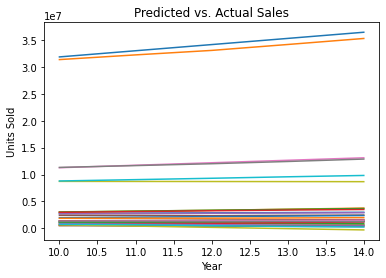

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load data from excel file
df = pd.read_excel("test.xlsx")

# Create a list of products
products = df.columns[1:]

# Loop through each product
for product in products:
    
    # Split the data into independent and dependent variables
    X = df['Year'].values
    y = df[product].values

    # Convert the independent variable to a 2-dimensional array
    # X = X.reshape(-1, 1)
    # Normalize the independent variable
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X.reshape(-1, 1))
    y = scaler.fit_transform(y.reshape(-1, 1))
    
    # Split the data into training and testing sets
    n = len(y)

    # Split the data into training and testing sets
    y_train, y_test = train_test_split(y, test_size=5, shuffle=False)
    
    # Fit the grey model to the training data
    grey = sm.tsa.ExponentialSmoothing(y_train, trend="add").fit()

    # Predict the future sales for each product using the test data
    y_pred = grey.predict(start=df.index[-5], end=df.index[-1])
    mse = mean_squared_error(y_test, y_pred)
    y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    print("\n")
    print("Product:", product)
    print("MSE:", mse)
    print("Testing Period:", df['Year'].iloc[test_idx[0]], "to", df['Year'].iloc[test_idx[-1]])
    print("Predicted vs. Actual:")
    for i in range(len(y_pred)):
        print(int(y_pred[i]), "vs.", int(y_test[i]))
        
     # Predict the future sales from 2018 to 2030
    future_years = np.array(range(2018, 2031)).reshape(-1, 1)
    future_years = scaler.transform(future_years)
    
    future_pred = grey.predict(start=n, end=n+12)
    future_pred = scaler.inverse_transform(future_pred.reshape(-1, 1))
    print("\n")
    print("Future Predictions:")
    for i in range(len(future_pred)):
        print("Year", 2018 + i, ":", int(future_pred[i]))
        
    # Plot the predicted vs. actual sales
    plt.plot(test_idx, y_pred, label='Predicted')
    plt.plot(test_idx, y_test, label='Actual')
    plt.xlabel('Year')
    plt.ylabel('Units Sold')
    plt.title('Predicted vs. Actual Sales')
    plt.legend
    
    